# Module 3 Assignment - Cleaning “Messy” Data

### Group Member: Zhijing Zhang, Gege Li

In [1]:
#load all the libraries that are needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency,iqr
from sklearn.preprocessing import OneHotEncoder

## **1.Introduction**

The problem here is to clean the messy data and find the insight of this dataset. 

In order to solve this problem, we plan to do some exploratory data analysis in its raw state. From these EDA, we can find the steps we need to take to address the data integrity and usability issues.

Then we are going to do some data preparation to clean this messy dataset. Including fill the missing data values, create some new variables, and transformed data via mathematical transforms and binning.

At last, we will present our post-data prep EDA analysis and explain it. Re-run all the EDA to show the result of our data preparation work.

## **2.Exploratory Data Analysis**
In this part, we are going to do some exploratory data analysis in its raw state. From these EDA, we can find what else steps should we do more.

First of all, read the dataset.

In [2]:
# read the dataset from github
data = pd.read_csv("https://raw.githubusercontent.com/zhijing-zhang/DAV6150/master/Dataset/M3_Data.csv")
#data = pd.read_csv('https://raw.githubusercontent.com/gegeli638/DAV-6150/master/M3_Data.csv')
data.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0



First of all, let's see the data overview. Then we'll see the details of some columns.

__Data Overview__

In [3]:
#describe the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
INDEX,12795.0,8069.980305,4656.905107,1.00000,4037.50000,8110.00000,12106.500000,16129.00000
TARGET,12795.0,3.029074,1.926368,0.00000,2.00000,3.00000,4.000000,8.00000
FixedAcidity,12795.0,7.075717,6.317643,-18.10000,5.20000,6.90000,9.500000,34.40000
VolatileAcidity,12795.0,0.324104,0.784014,-2.79000,0.13000,0.28000,0.640000,3.68000
CitricAcid,12795.0,0.308413,0.862080,-3.24000,0.03000,0.31000,0.580000,3.86000
ResidualSugar,12179.0,5.418733,33.749379,-127.80000,-2.00000,3.90000,15.900000,141.15000
Chlorides,12157.0,0.054822,0.318467,-1.17100,-0.03100,0.04600,0.153000,1.35100
FreeSulfurDioxide,12148.0,30.845571,148.714558,-555.00000,0.00000,30.00000,70.000000,623.00000
TotalSulfurDioxide,12113.0,120.714233,231.913211,-823.00000,27.00000,123.00000,208.000000,1057.00000
Density,12795.0,0.994203,0.026538,0.88809,0.98772,0.99449,1.000515,1.09924


In [131]:
data.nunique()

INDEX                 12795
TARGET                    9
FixedAcidity            470
VolatileAcidity         815
CitricAcid              602
ResidualSugar          2077
Chlorides              1663
FreeSulfurDioxide       999
TotalSulfurDioxide     1370
Density                5933
pH                      497
Sulphates               630
Alcohol                 401
LabelAppeal               5
AcidIndex                14
STARS                     4
dtype: int64

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               9436 non-null   float64
dtypes: f

In [133]:
data.isnull().sum()

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

From the information above, we know that there are some missing value in this dataset. We need to fix it in data preparation part. 

Now we are going to do some EDA to show the details of the dataset.

__Data Details__

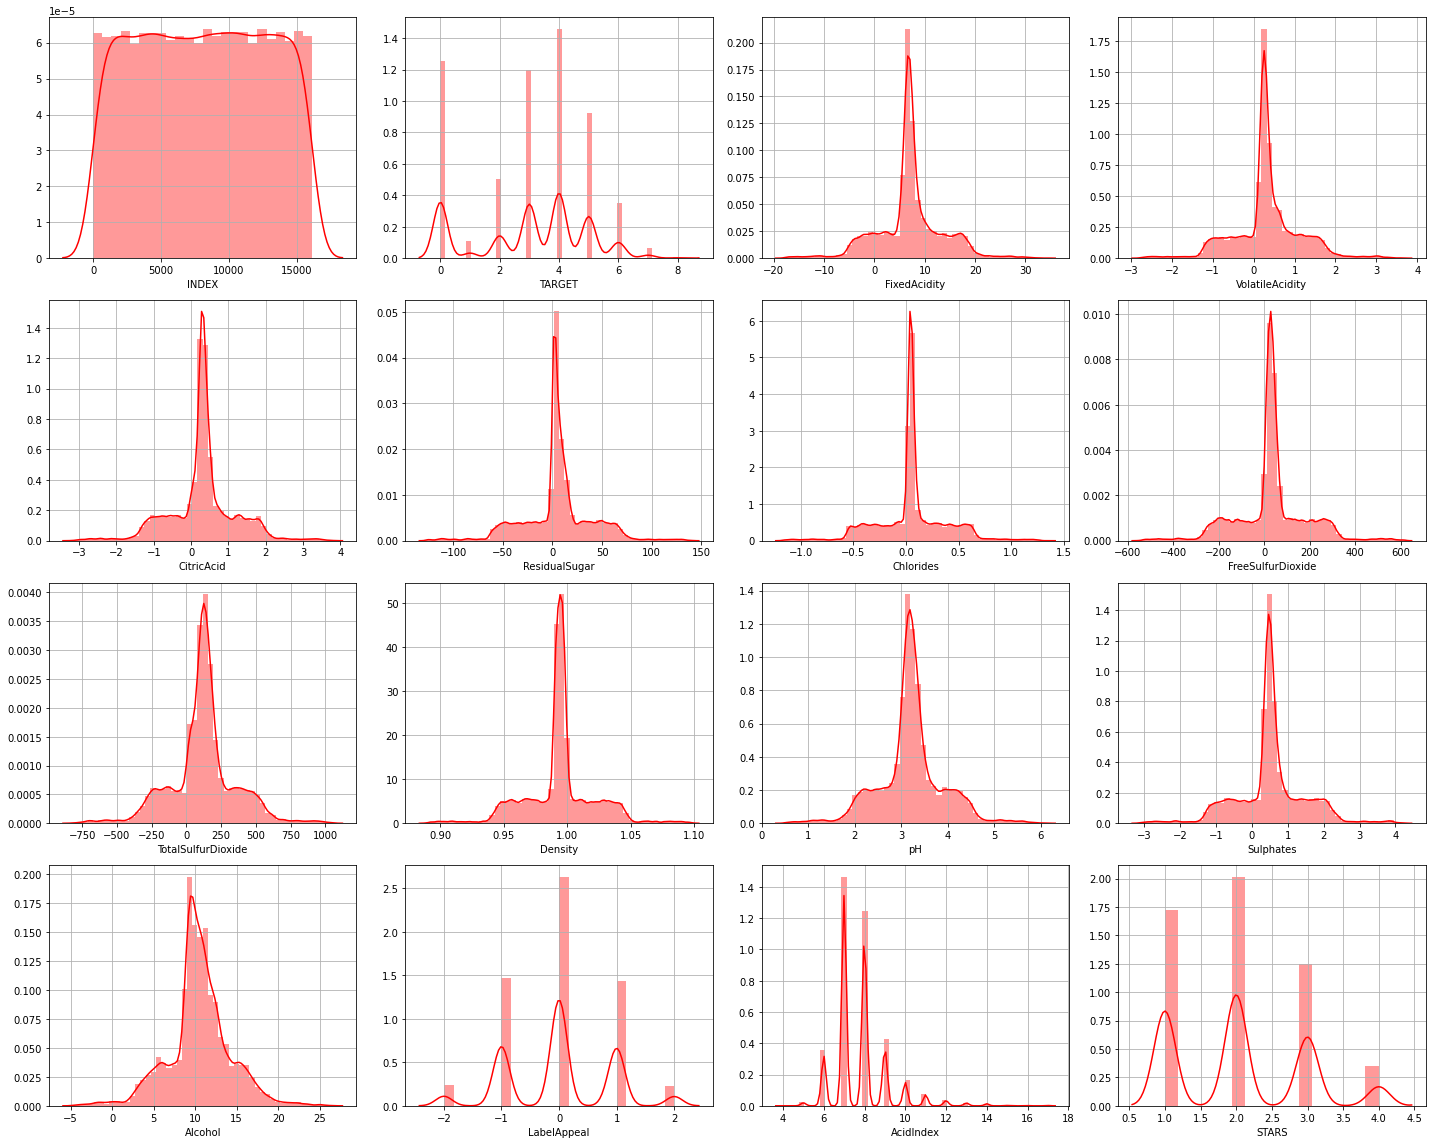

In [134]:
#distribution histogram of all variables
plt.figure(figsize = (20, 16))
for i, col in enumerate(list(data.columns.values)):
    plt.subplot(4, 4, i + 1)
    sns.distplot(data[col], color = 'r', kde = True)
    plt.grid()
    plt.tight_layout()

Apparently, INDEX is an useless observation that we will deleted later.




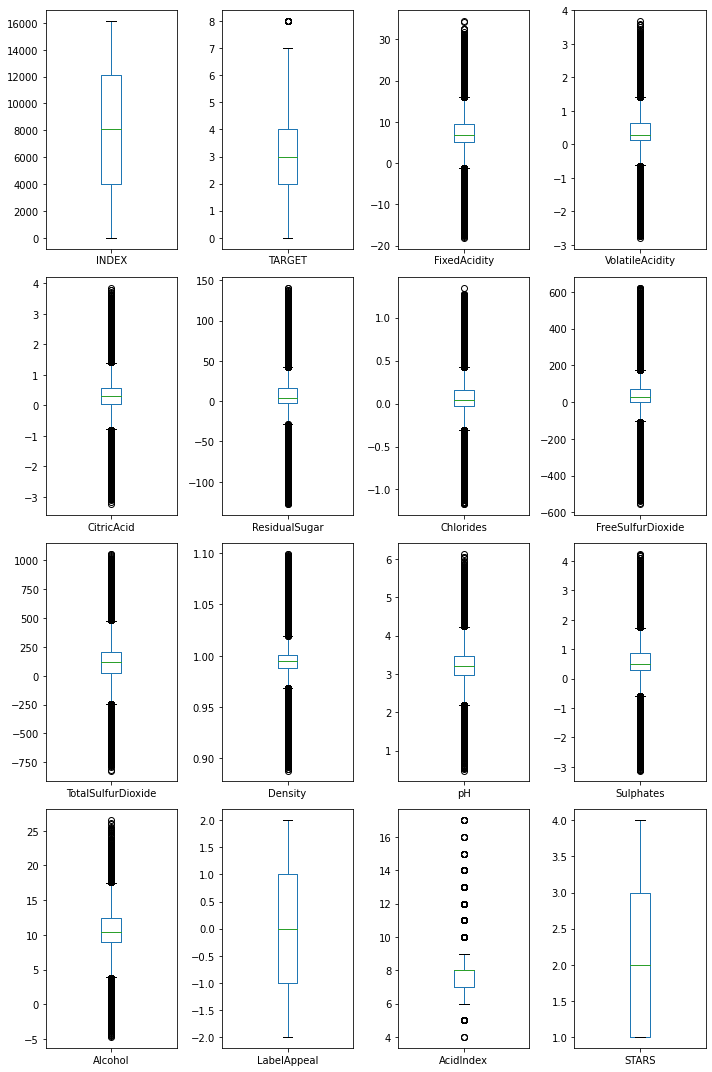

In [135]:
#boxplot of all variables
plt.figure(figsize = (10, 15))
for i, col in enumerate(list(data.columns.values)):
    plt.subplot(4, 4, i + 1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()

There are lots of outliers in the boxplots. We cannot get more useful information from this plot. So later we should deal with the outliers.

Let's see more details of some variables in this dataset.

__Variables Details__

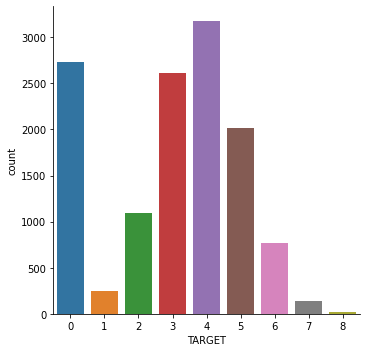

In [136]:
# #of cases of wine sold
sns.catplot(x='TARGET',data=data,kind='count')

In [137]:
#count the value
data.TARGET.value_counts()

4    3177
0    2734
3    2611
5    2014
2    1091
6     765
1     244
7     142
8      17
Name: TARGET, dtype: int64

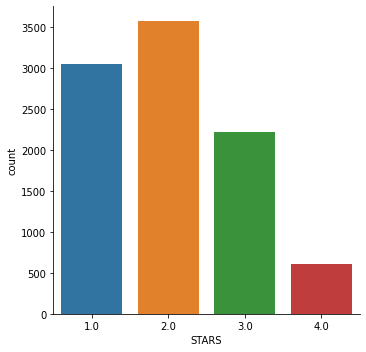

In [138]:
#Wine rating as determined by experts (4 = excellent; 1 = Poor)
sns.catplot(x='STARS',data=data,kind='count')

In [139]:
#count the value
data.STARS.value_counts()

2.0    3570
1.0    3042
3.0    2212
4.0     612
Name: STARS, dtype: int64

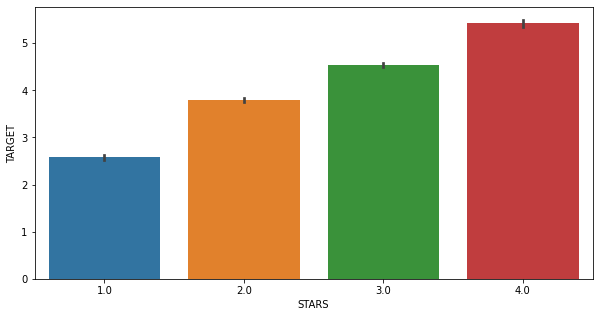

In [140]:
#TARGET and STARS
plt.figure(figsize=(10,5))
sns.barplot(x="STARS", y="TARGET", data=data)

We select the two variables above because we think they can be predicted variables when we want to construct some models. When the STARS become higher, the TARGET become higher. So later we will only choose TARGET as our predicted variable.

Then let's see the relationship of all variables.

__Data Relationship__

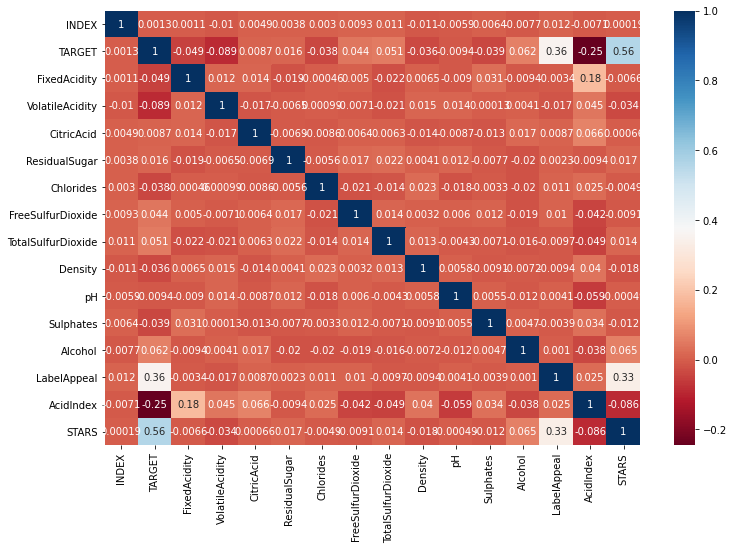

In [141]:
#correlation heatmap 
plt.figure(figsize=(12,8))
ax = sns.heatmap(data.corr(), cmap='RdBu', annot=True)
plt.show()

From this correlation heatmap we can see that AcidIndex may have a relationship with TARGET. Let's see the details in bar chart.

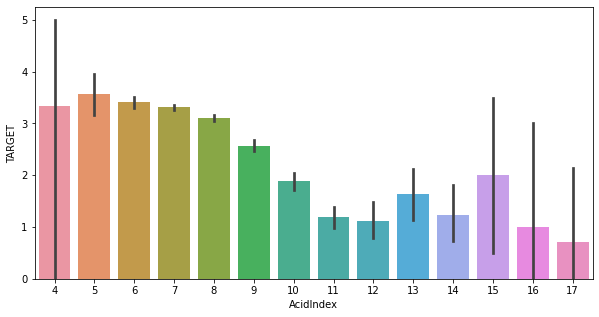

In [142]:
#TARGET and AcidIndex
plt.figure(figsize=(10,5))
sns.barplot(x="AcidIndex", y="TARGET", data=data)

In further analysis, we want to show the ration of FreeSulfurDioxide and TotalSulfurDioxide, VolatileAcidity and CitricAcid. So we will show the EDA of these variables at first. Then to find what data preperation we need to do.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac01676e80>,
      dtype=object)

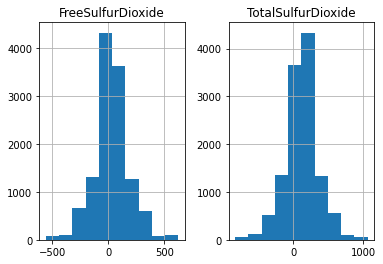

In [143]:
data[['FreeSulfurDioxide','TotalSulfurDioxide']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac0e869f60>,
      dtype=object)

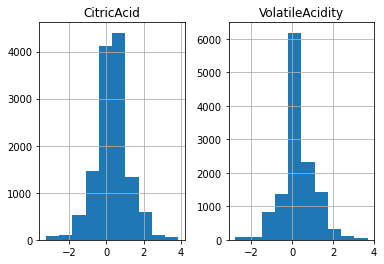

In [144]:
data[['VolatileAcidity','CitricAcid']].hist()

From these plots above we cannot see their ration, so we will create a new interaction features in data preparation part.

**This is just a 'draft' of our EDA. When we did the data preparation, we will find more to analyze after all the data been cleaned to make sense.**

## **3.Data Preparation**
First of all, copy the original dataset and drop the INDEX column that we don't need.

In [4]:
#copy the original dataset
wine = data.copy()
wine.tail()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
12790,16120,0,5.0,-0.79,2.01,5.0,0.043,17.0,101.0,1.01077,3.39,0.57,4.9,1,5,NaN
12791,16123,5,8.9,0.47,0.29,84.9,0.259,54.0,NaN,0.99518,4.46,-1.20,NaN,-1,8,2.0
12792,16127,4,6.0,0.17,-1.10,37.0,0.078,25.0,108.0,0.99076,3.25,NaN,12.3,0,6,2.0
12793,16128,3,7.7,0.32,0.12,NaN,0.029,26.0,274.0,0.99060,3.97,0.62,11.0,-1,6,2.0
12794,16129,4,5.2,-0.04,-0.81,52.7,NaN,-106.0,242.0,0.99454,3.94,-0.12,9.9,0,7,2.0


In [5]:
#drop the INDEX that we don't need
wine.drop(['INDEX'], axis=1, inplace=True)
wine.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


__Change the unreasonable values__

There some values that do not make sense.
- For example, alcohol is a percentage by volume so it should be positive. But in this dataset, some of the value are negative. That's make no sense so we shuold change it.
- In other variables, there are quite a few negative values where it seems like there shouldn’t be. Residual sugar is typically measured as either a percentage (ranging from 0.1-20%) or in grams per liter (rangining from 1 to 200). So there really should not be negative values. 

In [6]:
#wine.Alcohol.
wine = wine[np.abs( (wine['Alcohol']  > 0))]
wine.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
2,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0
5,0,11.3,0.320,0.59,2.2,0.556,-37.0,15.0,0.99940,3.20,1.29,15.4,0,11,NaN


In [7]:
#wine.ResidualSugar.
wine = wine[np.abs( (wine['ResidualSugar']  >-20.0))]
wine.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
2,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0
5,0,11.3,0.320,0.59,2.2,0.556,-37.0,15.0,0.99940,3.20,1.29,15.4,0,11,NaN


__Fill the missing data values__

In [8]:
#check the missing values
wine.isnull().sum()

TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar            0
Chlorides              436
FreeSulfurDioxide      472
TotalSulfurDioxide     487
Density                  0
pH                     303
Sulphates              908
Alcohol                  0
LabelAppeal              0
AcidIndex                0
STARS                 2449
dtype: int64

There are lots of missing values here so we cannot simply use deleted. We plan to fill the missing values with a valid value derived from the actual valid values of the variables (e.g., mean, mode, median. Depends on the variable). 

After analysis the describe of the dataset, we find:
- for FreeSulfurDioxide, pH, Sulphates,and Alcohol, the mean and median are very close. So we decided to use median to fill the missing values;
- for ResidualSugar, Chlorides, and TotalSulfurDixide, there are different between mean and median. Based on their distribution, we dicided to use mean to fill the missing values.

In [9]:
# FreeSulfurDioxide- median
imp = SimpleImputer(missing_values=np.nan, strategy='median')
array = wine.FreeSulfurDioxide.values.reshape(-1,1)
predictors_imputed = imp.fit_transform(array)  
wine.FreeSulfurDioxide = predictors_imputed

In [10]:
#test that we fill all the null
wine.FreeSulfurDioxide.isnull().sum()

0

In [11]:
# pH- median
imp = SimpleImputer(missing_values=np.nan, strategy='median')
array = wine.pH.values.reshape(-1,1)
predictors_imputed = imp.fit_transform(array)  
wine.pH = predictors_imputed

In [12]:
#test that we fill all the null
wine.pH.isnull().sum()

0

In [13]:
# Sulphates- median
imp = SimpleImputer(missing_values=np.nan, strategy='median')
array = wine.Sulphates.values.reshape(-1,1)
predictors_imputed = imp.fit_transform(array)  
wine.Sulphates = predictors_imputed

In [14]:
#test that we fill all the null
wine.Sulphates.isnull().sum()

0

In [15]:
# Alcohol- median
imp = SimpleImputer(missing_values=np.nan, strategy='median')
array = wine.Alcohol.values.reshape(-1,1)
predictors_imputed = imp.fit_transform(array)  
wine.Alcohol = predictors_imputed

In [16]:
#test that we fill all the null
wine.Alcohol.isnull().sum()

0

In [17]:
# TotalSulfurDioxide- mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
array = wine.TotalSulfurDioxide.values.reshape(-1,1)
predictors_imputed = imp.fit_transform(array)  
wine.TotalSulfurDioxide = predictors_imputed

In [18]:
#test that we fill all the null
wine.TotalSulfurDioxide.isnull().sum()

0

In [19]:
# ResidualSugar- mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
array = wine.ResidualSugar.values.reshape(-1,1)
predictors_imputed = imp.fit_transform(array)  
wine.ResidualSugar = predictors_imputed

In [20]:
#test that we fill all the null
wine.ResidualSugar.isnull().sum()

0

In [21]:
# Chlorides- mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
array = wine.Chlorides.values.reshape(-1,1)
predictors_imputed = imp.fit_transform(array)  
wine.Chlorides = predictors_imputed

In [22]:
#test that we fill all the null
wine.Chlorides.isnull().sum()

0

__Create new variables- Interaction features__

After searching a lot and developed our domain knowledge, we decide to add two variables: sulfurDioxide_ratio and acid_ratio.

In a wine, the free sulfur dioxide is the most useful part. If the ration of free sulfur dioxide in total sulfur dioxide is higher, that means the wine is better. So we decided to add this new interaction feature to predict the wine TARGET.

The same as the acid_ratio, volatile acidity contains malic acid, tartaric acid, and citric acid. If there are more citric acid in volatile acidity, the wine taste better. So we add this new interaction feature to predict the wine TARGET.

In [23]:
# Create "Interaction" Features
wine["sul_ratio"] = wine["FreeSulfurDioxide"] / wine["TotalSulfurDioxide"]
wine.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS,sul_ratio
0,3,3.2,1.160,-0.98,54.2,-0.567000,31.0,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0,0.115672
2,5,7.1,2.640,-0.88,14.8,0.037000,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0,1.507042
3,3,5.7,0.385,0.04,18.8,-0.425000,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0,0.191304
4,4,8.0,0.330,-1.26,9.4,0.054166,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0,-1.546296
5,0,11.3,0.320,0.59,2.2,0.556000,-37.0,15.0,0.99940,3.20,1.29,15.4,0,11,NaN,-2.466667


In [24]:
# Create "Interaction" Features
wine["acid_ratio"] = wine["CitricAcid"] / wine["VolatileAcidity"]
wine.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS,sul_ratio,acid_ratio
0,3,3.2,1.160,-0.98,54.2,-0.567000,31.0,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0,0.115672,-0.844828
2,5,7.1,2.640,-0.88,14.8,0.037000,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0,1.507042,-0.333333
3,3,5.7,0.385,0.04,18.8,-0.425000,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0,0.191304,0.103896
4,4,8.0,0.330,-1.26,9.4,0.054166,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0,-1.546296,-3.818182
5,0,11.3,0.320,0.59,2.2,0.556000,-37.0,15.0,0.99940,3.20,1.29,15.4,0,11,NaN,-2.466667,1.843750


__Create new variables- Dummy Variable__

We change the names of the STARS. 1 as poor, 2 as not bad, 3 as good, 4 as excellent and 'NAN' as none. Then we change it into binary indicator variable.


In [25]:
# Adding "Dummy" Variables
wine.STARS.replace({np.nan:'none',1.0:'poor',2.0:'not bad',3.0:'good',4.0:'excellent'}, inplace = True)
wine.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS,sul_ratio,acid_ratio
0,3,3.2,1.160,-0.98,54.2,-0.567000,31.0,268.0,0.99280,3.33,-0.59,9.9,0,8,not bad,0.115672,-0.844828
2,5,7.1,2.640,-0.88,14.8,0.037000,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,good,1.507042,-0.333333
3,3,5.7,0.385,0.04,18.8,-0.425000,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,poor,0.191304,0.103896
4,4,8.0,0.330,-1.26,9.4,0.054166,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,not bad,-1.546296,-3.818182
5,0,11.3,0.320,0.59,2.2,0.556000,-37.0,15.0,0.99940,3.20,1.29,15.4,0,11,none,-2.466667,1.843750


In [26]:
#Change STARS into binary indicator variable
wine_full = pd.get_dummies(wine)
wine_full.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,...,Alcohol,LabelAppeal,AcidIndex,sul_ratio,acid_ratio,STARS_excellent,STARS_good,STARS_none,STARS_not bad,STARS_poor
0,3,3.2,1.160,-0.98,54.2,-0.567000,31.0,268.0,0.99280,3.33,...,9.9,0,8,0.115672,-0.844828,0,0,0,1,0
2,5,7.1,2.640,-0.88,14.8,0.037000,214.0,142.0,0.99518,3.12,...,22.0,-1,8,1.507042,-0.333333,0,1,0,0,0
3,3,5.7,0.385,0.04,18.8,-0.425000,22.0,115.0,0.99640,2.24,...,6.2,-1,6,0.191304,0.103896,0,0,0,0,1
4,4,8.0,0.330,-1.26,9.4,0.054166,-167.0,108.0,0.99457,3.12,...,13.7,0,9,-1.546296,-3.818182,0,0,0,1,0
5,0,11.3,0.320,0.59,2.2,0.556000,-37.0,15.0,0.99940,3.20,...,15.4,0,11,-2.466667,1.843750,0,0,1,0,0


## **4.Prepped Data Review**
In this part, we are going to re-run some of our previous EDA. And we will build a model to predict the TARGET by the new variables we create in data preperation part.

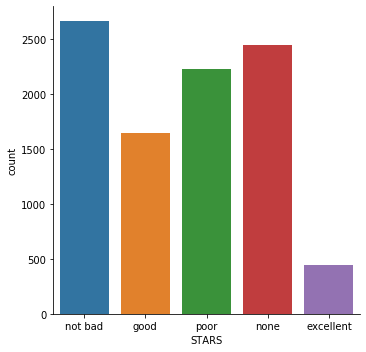

In [27]:
#Wine rating as determined by experts (4 = excellent; 1 = Poor)
sns.catplot(x='STARS',data=wine,kind='count')

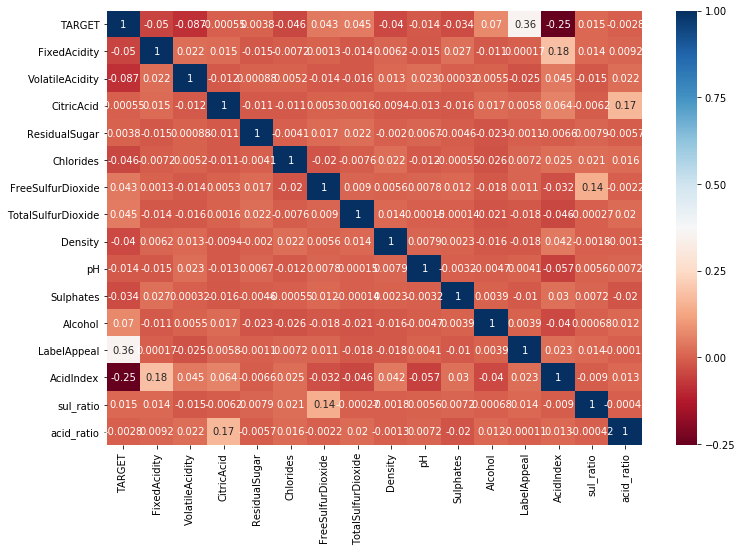

In [28]:
#correlation heatmap 
plt.figure(figsize=(12,8))
ax = sns.heatmap(wine.corr(), cmap='RdBu', annot=True)
plt.show()

We can see the catplot of STARS and the heatmap change.

Then we will build a model to predict the TARGET.

In [ ]:
m_full3 = sm.formula.ols(formula = 'TARGET ~  FixedAcidity + ResidualSugar + Density + pH + Alcohol  + AcidIndex+sul_ratio+acid_ratio+STARS_excellent+ STARS_good+STARS_none+STARS_not bad+ STARS_poor ', data = wine_full)
multi_reg3 = m_full3.fit()
print(multi_reg3.summary())

In [ ]:
residuals = evals.score-multi_reg3.predict(evals[evals.columns[:-1]])
plt.hist(residuals, bins = 15)
plt.rcParams['figure.figsize'] = (10,5)
plt.show();

In [ ]:
probplot(residuals, plot = plt)
plt.rcParams['figure.figsize'] = (10,5)
plt.show();

In [ ]:
sns.residplot(evals.bty_avg, residuals, evals)
plt.rcParams['figure.figsize'] = (10,5)
plt.show();

Residuals are getting closer to normality but are still left skewed. Q-Q plot is closer to normality, but not completely there, and residuals still display constant variability.

## **5.Conclusions**
From all the steps above we can find that:

- With a messy dataset, we cannot get more useful information.
- In order to do the data preparation, we need to consider more and get more familiar with the dataset. During this process, we will also find some other analyses that can be done.
- The post-Data Prep EDA analysis becomes more clear and we can do the predicted model more logically.

Lesson Learned:

This is our first time trying to use co-lab. For us, this is the hardest part. We spend lots of time getting familiar with it and even lost some code and repeated the same things again and again. For this assignment, we learn how to use co-lab is also a meaningful part.

## References
https://www.cdrfoodlab.com/solutions/wine-analysis-equipment/

https://github.com/methodmatters/wine_data

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87